In [1]:
#1. Data Pipeline Creation

In [2]:
#1.1 Import Data

In [3]:
import numpy as np, tensorflow as tf, cv2 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os
import keras
import imghdr
from matplotlib import pyplot as plt

In [4]:
os.path.join('Desktop/Code/AI/Final Run Brain Tumor CNN/Dataset')

'Desktop/Code/AI/Final Run Brain Tumor CNN/Dataset'

In [5]:
#1.2 GPU Setup

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

1

In [7]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
#1.3 Remove Dodgy Images

In [9]:
data_dir1 = r'C:\Users\USER\Desktop\Code\AI\Final Run Brain Tumor CNN\Dataset\Testing'
data_dir2 = r'C:\Users\USER\Desktop\Code\AI\Final Run Brain Tumor CNN\Dataset\Training'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir1):
    for image in os.listdir(os.path.join(data_dir1, image_class)):
        image_path = os.path.join(data_dir1, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with {Image}'.format(image_path))

In [11]:
for image_class in os.listdir(data_dir2):
    for image in os.listdir(os.path.join(data_dir2, image_class)):
        image_path = os.path.join(data_dir2, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with {Image}'.format(image_path))

In [12]:
#2. Preprocessing Images for DL

In [13]:
#2.1 Resizing + Labelling Data Set Categorically

In [14]:
#Preprocessing Training Data Set:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in labels:
    folderpath = os.path.join(r'C:\Users\USER\Desktop\Code\AI\Final Run Brain Tumor CNN\Dataset\Training', i)
    for j in os.listdir(folderpath):
        img = cv2.imread(os.path.join(folderpath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)
        
#Preprocessing Testing Data Set:
X_test = []
Y_test = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for i in labels:
    folderpath = os.path.join(r'C:\Users\USER\Desktop\Code\AI\Final Run Brain Tumor CNN\Dataset\Testing', i)
    for j in os.listdir(folderpath):
        img = cv2.imread(os.path.join(folderpath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [15]:
#2.2 Shuffling Data

In [16]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 101)

In [17]:
#2.3: Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 101) 

In [19]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [20]:
#3 Creating Deep Neural Network

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [22]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150, 3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [24]:
def f1_score(y_true, y_pred):
    # Convert predictions to binary (0 or 1)
    y_pred = tf.round(y_pred)  # Round predictions to the nearest integer (0 or 1)
    
    # Calculate true positives, false positives, and false negatives
    true_positives = tf.reduce_sum(y_true * y_pred)
    predicted_positives = tf.reduce_sum(y_pred)
    actual_positives = tf.reduce_sum(y_true)

    # Calculate precision and recall
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (actual_positives + tf.keras.backend.epsilon())

    # Calculate F1 score
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1

In [25]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy', f1_score, keras.metrics.Precision(), keras.metrics.Recall()])

In [26]:
#3.2 Train

In [27]:
history = model.fit(X_train, y_train, epochs = 30, validation_split = 0.1)

Epoch 1/30
83/83 [==============================] - 10s 75ms/step - loss: 3.1426 - accuracy: 0.2853 - f1_score: 0.0132 - precision: 0.1719 - recall: 0.0125 - val_loss: 1.3682 - val_accuracy: 0.2891 - val_f1_score: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
83/83 [==============================] - 5s 57ms/step - loss: 1.3315 - accuracy: 0.3477 - f1_score: 0.0160 - precision: 0.4355 - recall: 0.0102 - val_loss: 1.2289 - val_accuracy: 0.4286 - val_f1_score: 0.1641 - val_precision: 0.6923 - val_recall: 0.0918
Epoch 3/30
83/83 [==============================] - 5s 59ms/step - loss: 1.1596 - accuracy: 0.4858 - f1_score: 0.2631 - precision: 0.5668 - recall: 0.1846 - val_loss: 1.1360 - val_accuracy: 0.5034 - val_f1_score: 0.4392 - val_precision: 0.5926 - val_recall: 0.3810
Epoch 4/30
83/83 [==============================] - 5s 56ms/step - loss: 0.9758 - accuracy: 0.5808 - f1_score: 0.5075 - precision: 0.6724 - recall: 0.4124 - val_loss: 0.9552 - val_accuracy: 0.

In [28]:
model.save('BrainTumorIdentificationCNN.h5')

In [29]:
#4: Evaluating Model Performance

In [30]:
#4.1 Accuracy, Precision, F1, Loss Graphs:

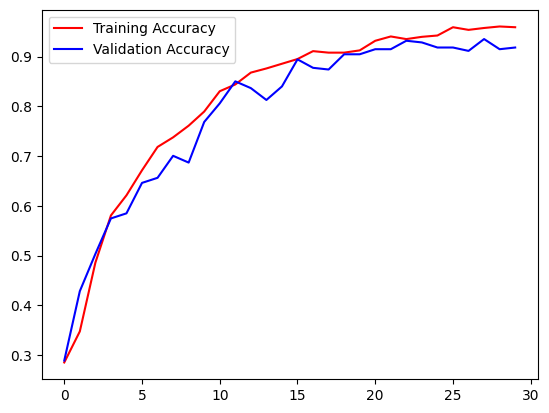

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.figure()

plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.legend(loc = 'upper left')
plt.show()

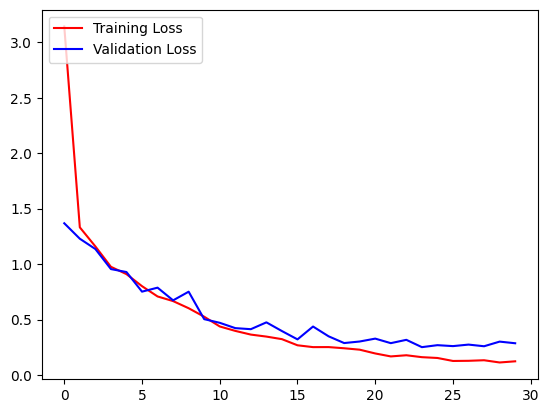

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.figure()

plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.legend(loc = 'upper left')
plt.show()

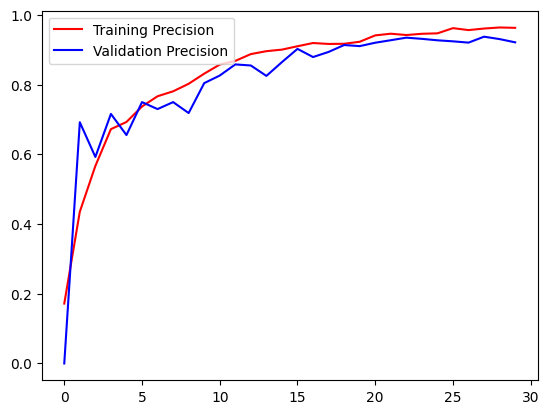

In [33]:
prec = history.history['precision']
val_prec = history.history['val_precision']
epochs = range(len(acc))
plt.figure()

plt.plot(epochs, prec, 'r', label = "Training Precision")
plt.plot(epochs, val_prec, 'b', label = "Validation Precision")
plt.legend(loc = 'upper left')
plt.show()

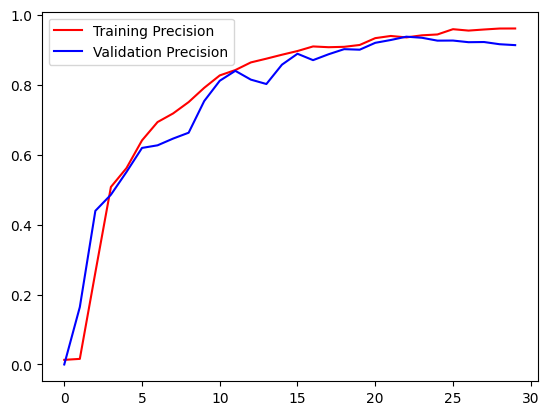

In [34]:
f1 = history.history['f1_score']
val_f1 = history.history['val_f1_score']
epochs = range(len(acc))
plt.figure()

plt.plot(epochs, f1, 'r', label = "Training Precision")
plt.plot(epochs, val_f1, 'b', label = "Validation Precision")
plt.legend(loc = 'upper left')
plt.show()

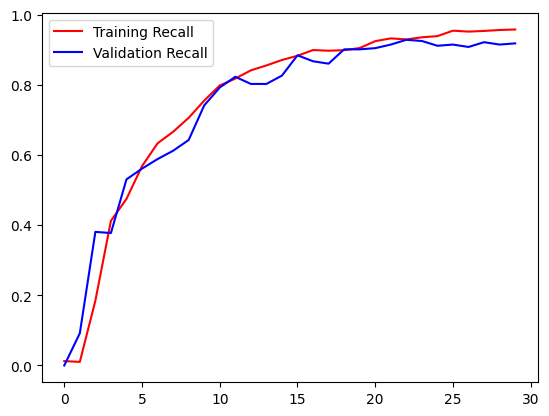

In [35]:
rec = history.history['recall']
val_rec = history.history['val_recall']
epochs = range(len(acc))
plt.figure()

plt.plot(epochs, rec, 'r', label = "Training Recall")
plt.plot(epochs, val_rec, 'b', label = "Validation Recall")
plt.legend(loc = 'upper left')
plt.show()

In [36]:
#4.2: Evaluate

In [37]:
loss, accuracy, precision, f1_score, recall = model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 42ms/step - loss: 0.2856 - accuracy: 0.9358 - f1_score: 0.9430 - precision: 0.9415 - recall: 0.9358


M1 OG

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150, 3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
#model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
#model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

M2 Simplified

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150, 3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

In [38]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    3.0.0
astunparse                   1.6.3
cachetools                   5.5.0
certifi                      2024.8.30
charset-normalizer           3.4.0
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.9
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.55.2
gast                         0.4.0
google-auth                  2.36.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.68.1
h5py                         3.12.1
idna                         3.10
importlib_metadata           8.5.0
importlib_resources          6.4.5
ipykernel                    6.29.5
i